# Importar bibliotecas o módulos

In [1]:
from IPython.display import clear_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json
import ec_phys as ep

# Bajar datos del índice

El objetivo es bajar la lista de componentes del [BMV/IPC](https://www.bmv.com.mx/es/indices/principales/) _(Bolsa Mexicana de Valores / Índice de Precios y Cotizaciones)_ y obtener series de tiempo de [Yahoo Finance](https://finance.yahoo.com/). Como ejemplo, vamos a descargar el índice a partir de su símbolo _ticker_. Puedes recuperar todas las compañías componentes de [esta](https://espanol.spindices.com/indices/equity/sp-bmv-ipc) página.

In [2]:
bmv=ep.TimeSeries('^MXX',(2010,1,1),(2019,12,31)) #En formato (AAAA,MM,DD)::tuple

Los datos para ^MXX se bajaron sin pedos.

Hay un total de 2501 registros.


**`bmv` es una instancia de la clase TimeSeries(), y tiene los siguientes atributos: `info` y `data`:**

In [3]:
bmv.info

{'symbol': '^MXX',
 'name': 'IPC MEXICO',
 'exch': 'MEX',
 'type': 'I',
 'exchDisp': 'Mexico',
 'typeDisp': 'Index'}

In [4]:
bmv.data[0:2] #Acá tomo sólo una rebanada porque es una lista con chingos de registros.

[{'date': '2010-01-04',
  'open': 32120.740234,
  'high': 32758.529297,
  'low': 32120.740234,
  'close': 32758.529297,
  'adj_close': 32758.529297,
  'volume': 136257800},
 {'date': '2010-01-05',
  'open': 32729.300781,
  'high': 33073.710938,
  'low': 32628.240234,
  'close': 32732.759766,
  'adj_close': 32732.759766,
  'volume': 165541900}]

# Conseguir el símbolo bursátil (ticker) de una compañía

Primero pensamos en el nombre de una compañía: `Banco del Bajio`, y lo usamos dentro de una cadena (`str`) con palabras clave para conseguir las características. Las acciones cotizadas en la BMV tienen el sufijo `.MX`.

In [5]:
comp=ep.TimeSeries('Bajio',(2010,1,1),(2019,12,31))


 ***** 

Opción 0:
 {'symbol': 'BBAJF', 'name': 'Banco del Bajio, S.A., Institucion de Banca Multiple', 'exch': 'PNK', 'type': 'S', 'exchDisp': 'OTC Markets', 'typeDisp': 'Equity'}

 ***** 

Opción 1:
 {'symbol': 'BBAJIOO.MX', 'name': 'Banco del Bajio, S.A., Institucion de Banca Multiple', 'exch': 'MEX', 'type': 'S', 'exchDisp': 'Mexico', 'typeDisp': 'Equity'}

 ***** 

¿Cuál opción quieres?
1
Los datos para BBAJIOO.MX se bajaron sin pedos.

Hay un total de 644 registros.


**Uno de los _lastres/castres_ principales de YahooFinance es que algunas compañías no tienen registros completos :c**

In [6]:
comp.info

{'symbol': 'BBAJIOO.MX',
 'name': 'Banco del Bajio, S.A., Institucion de Banca Multiple',
 'exch': 'MEX',
 'type': 'S',
 'exchDisp': 'Mexico',
 'typeDisp': 'Equity'}

# Bajar los datos de las compañías constituyentes

Una posible forma de proceder (seguro se te ocurre alguna más chida :3) es definir el horizonte temporal de la descarga, definir una lista de (los tickers de las) compañías `(str)` y descargar los datos en un diccionario.

Para conseguir los tickers, puedes usar la función `ep.query(company::str)`.

In [7]:
ep.query('Walmart')

[{'symbol': 'WMT',
  'name': 'Walmart Inc.',
  'exch': 'NYQ',
  'type': 'S',
  'exchDisp': 'NYSE',
  'typeDisp': 'Equity'},
 {'symbol': 'WALM34.SA',
  'name': 'Walmart Inc.',
  'exch': 'SAO',
  'type': 'S',
  'exchDisp': 'Sao Paolo',
  'typeDisp': 'Equity'},
 {'symbol': 'WMT.MX',
  'name': 'Walmart Inc.',
  'exch': 'YHD',
  'type': 'S',
  'exchDisp': 'Industry',
  'typeDisp': 'Equity'},
 {'symbol': 'WMT.BA',
  'name': 'Walmart Inc.',
  'exch': 'BUE',
  'type': 'S',
  'exchDisp': 'Buenos Aires',
  'typeDisp': 'Equity'},
 {'symbol': '0R1W.IL',
  'name': 'WAL-MART STORES INC WALMART STO',
  'exch': 'IOB',
  'type': 'S',
  'exchDisp': 'International Orderbook - London',
  'typeDisp': 'Equity'},
 {'symbol': 'WMT.VI',
  'name': 'Walmart Inc.',
  'exch': 'VIE',
  'type': 'S',
  'exchDisp': 'Vienna',
  'typeDisp': 'Equity'},
 {'symbol': 'WMT.DE',
  'name': 'Walmart Inc.',
  'exch': 'GER',
  'type': 'S',
  'exchDisp': 'XETRA',
  'typeDisp': 'Equity'},
 {'symbol': 'WMT.SG',
  'name': 'Walmart In

Para bajar los datos de una lista de _tickers_, puedes usar la función `ep.get(company::str,inicio::tuple,fin::tuple)`:

In [8]:
lista=['LABB.MX','GENTERA.MX','WMT.MX'] #Genomma Lab, Gentera, Walmart
datos=dict()
inicio,fin=(2015,1,1),(2020,6,21)

for s in lista:
    datos[s]=ep.get(s,inicio,fin)

Los datos para LABB.MX se bajaron sin pedos.

Hay un total de 1373 registros.
Los datos para GENTERA.MX se bajaron sin pedos.

Hay un total de 1373 registros.
Los datos para WMT.MX se bajaron sin pedos.

Hay un total de 1373 registros.


Podemos ver qpdo con los últimos dos registros de Walmart.

In [9]:
datos['WMT.MX'][-3:-1]

[{'date': '2020-06-17',
  'open': 2671.530029,
  'high': 2671.530029,
  'low': 2650.5,
  'close': 2650.5,
  'adj_close': 2650.5,
  'volume': 41031},
 {'date': '2020-06-18',
  'open': 2656.0,
  'high': 2700.0,
  'low': 2656.0,
  'close': 2689.0,
  'adj_close': 2689.0,
  'volume': 48222}]

Este pedo se puede guardar en un archivo `json`:

In [10]:
with open('datos.json','w+') as arshivo:
    json.dump(datos,arshivo,ensure_ascii=False,indent=4) #Esto acomoda chido los datos y te deja usar UTF-8

# Mezclar los datos en una tabla sincronizada
Vamos a pensar sólo en los precios de cierre ajustados (_key_ `adj_close`, que consideran una corrección relacionada con el [reparto de dividendos](https://www.investopedia.com/terms/a/adjusted_closing_price.asp)).

In [11]:
tabla=pd.DataFrame()

for comp,dat in datos.items():
    X0=pd.DataFrame([x['adj_close'] for x in dat],
                    index=[pd.to_datetime(x['date']) for x in dat],
                    columns=[comp])
    tabla = pd.concat([tabla, X0], axis=1)
    
tabla

LABB.MX  GENTERA.MX       WMT.MX
2015-01-02  26.190001   23.955343  1271.396484
2015-01-05  24.420000   23.334867  1271.396484
2015-01-06  25.160000   23.988884  1278.802612
2015-01-07  25.070000   23.544487  1294.409424
2015-01-08  25.110001   23.703800  1311.485718
...               ...         ...          ...
2020-06-15  20.100000   10.430000  2616.179932
2020-06-16  20.350000   10.360000  2664.000000
2020-06-17  20.480000   10.350000  2650.500000
2020-06-18  20.000000   10.200000  2689.000000
2020-06-19  19.969999   10.730000  2696.479980

[1373 rows x 3 columns]

Y con un `DataFrame` de Pandas ya es más fácil calcular, por ejemplo, los rendimientos (logarítmicos)

In [12]:
tabla_rends=pd.DataFrame(np.diff(np.log(tabla),axis=0),index=tabla.index[1:],columns=tabla.columns)
tabla_rends

LABB.MX  GENTERA.MX    WMT.MX
2015-01-05 -0.069975   -0.026243  0.000000
2015-01-06  0.029853    0.027642  0.005808
2015-01-07 -0.003584   -0.018699  0.012130
2015-01-08  0.001594    0.006744  0.013106
2015-01-09 -0.011616   -0.006388 -0.011014
...              ...         ...       ...
2020-06-15 -0.004963   -0.009542 -0.005269
2020-06-16  0.012361   -0.006734  0.018114
2020-06-17  0.006368   -0.000966 -0.005080
2020-06-18 -0.023717   -0.014599  0.014421
2020-06-19 -0.001501    0.050656  0.002778

[1372 rows x 3 columns]

# Gráfica de la matriz de correlación

Primero calculamos la matriz de correlación. Las instancias `DataFrame` de Pandas tienen un método útil: `DataFrame.corr()`.

In [13]:
corr=tabla_rends.corr()

Graficamos con unos colores bien bergas.

Text(0.5, 0.98, 'Matriz de correlación (01/2015 - 06/2020)')

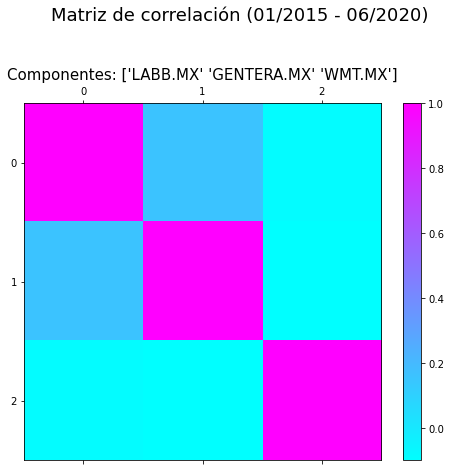

In [14]:
colores='cool'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))

cax=axes.matshow(corr,cmap=colores)
fig.colorbar(cax,shrink=0.82)

axes.set_title('Componentes: {}'.format(tabla_rends.columns.values),fontsize=15)

plt.suptitle('Matriz de correlación ({:%m/%Y} - {:%m/%Y})'.format(
    tabla_rends.index[0],tabla_rends.index[-1]),fontsize=18)

Puedes guardar la tabla de los rendimientos logarítmicos en formato `CSV`.

In [15]:
tabla_rends.to_csv('rendimientos.csv')